# Redes neuronales

Una red neuronal es como un cerebro muy sencillo, hecho de matemáticas. Está foprmada por muchas neuronas artificiales, que son epqueñas unidades que hacen cálculos.

Cada neurona:
    Recibe datos(por ejemplo, los px(píxeles) de una imagen o de una tabla)
    Los multuiplica por unos valores llamados pesos (que indican que datos son mas importantes).
    Suma todo y aplica una función (que decide si el resultado "se activa" o no).
    Envia el resultado a las siguientes neuronas, generando una red neuronal.

La red tiene diferentes capas:
    Una capa de entrada (recibe datos).
    Varias capas ocultas (procesan la información).
    Una capa de salida (da el resultado final, como "es un perro" o "es un gato" dependiendo de x imagen).

Durante el entrenamiento, la red compara su respuesta con la correcta yu ajusta los pesos para mejorar. Esto se repite miles de veces hasta que aprende a acertar por si sola y por esto los algoritmos de deep learning necesitan muchos datos.

Resumen;
Una red neuronal aprende a reconocer patrones ajustando poco a poco sus propios números internos (pesos) según los errores que comete.

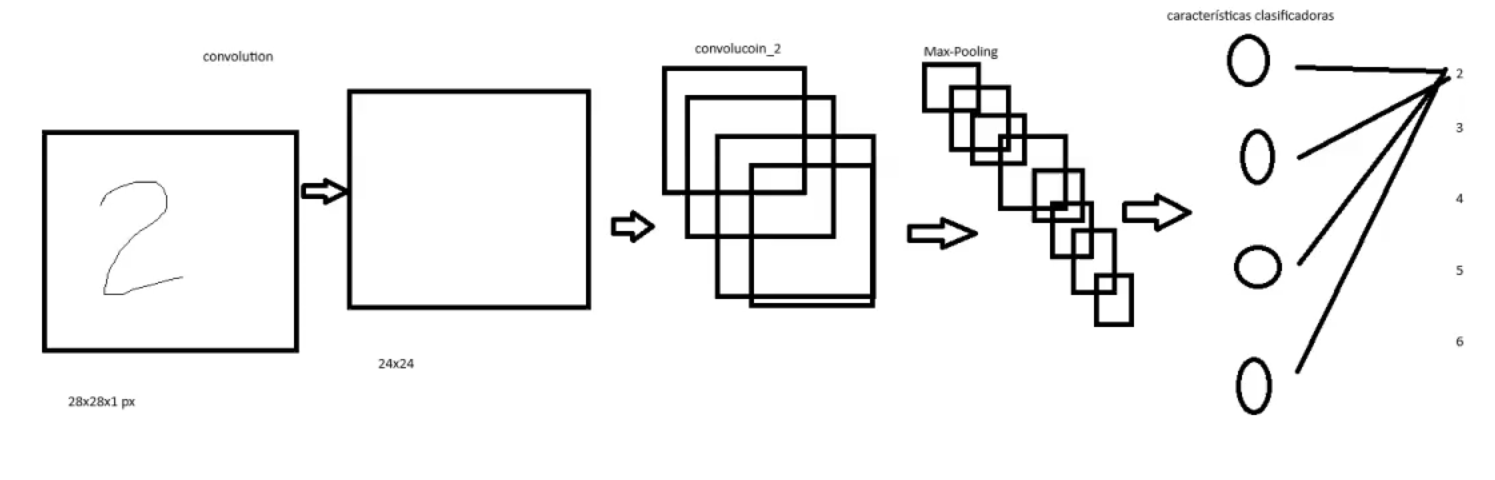

## Explicación Tensores y TensorFlow

#### Tensor:

Un tensor es una forma de guardar datos en varias dimensiones. Piensa en ello como la versión avanzada de lista o arreglo.

Ejemplos de datos - nivel de tensor:
    Un número --> es un tensor de 0 dimensiones(escalar) (5)
    Una lista de nº --> es un tensor de 1 dimension(vector) [1,2,3]
    Una tabla --> es un tensor de 2 dimensiones (matriz) (Ejemplo: Imagen en blanco y negro ([1,2],[3,4]))
    Una colección de tablas --> es un tensor de 3 o más dimensiones ("muchas imagenes") (Ejemplo: 3D: imagen con RGB, 4D: Colección de imagenes(video), 5D: Colección de videos; ...)

Los tensores son cajas de números ordenados que una red neuronal usa para calcular.

#### TensorFlow:

TensorFlow es una herramienta (libreria) creada por Google que:
    Crea y maneja tensores.
    Realiza operaciones matemáticas sobre ellos (sumas, mult, formulas, etc).
    Entrena redes neuronales de forma automática usando esos calculos.

En resumen: TensorFlow usa tensores (bloques de datos) para construir y entrenar redes neuronales.

Ejemplo práctico de comprensión:
    Cuantas más dimensiones, más complejo es tratar con la información: En Youtube se suben por minuto 500h, si suponemos que estan a 1080 son 2,073,600px y cada pixel tiene RGB (3 datos). Si multiplicamos todo esto, sale que Youtube procesa por minuto 37324800000 datos.

#### Procesamiento:

Capacidad de procesamiento cuidado porque el procesamiento del Tensor es muy pesado.

GPU(Tarjeta gráfica)
TPU(Tarjeta de tensores) La TPU es un "motor" especializado en cálculos de tensores, más rápido y eficiente que una GPU en muchas tareas de IA.

La TPU no se vende como hardware doméstico. Google las usa en sus centros de datos y las alquila a través de Google Cloud.

Si usas Google Colab funcionaras a partir de una TPU

#### ¿Ordenadores cuánticos?:

Son una nueva forma de computación que usa qubits en lugar de bits.

Un bit básico (como en CPU, GPU o TPU) solo puede valer o 0 o 1.
Un qubit puede valer 0 y 1 a la vez (superposición cuántica).
    Un ordenador cuático puede hacer muchisimos calculos a la vez, en lugar de uno por uno.

¿Qué relación tiene esto con las redes neuronales?
Hoy en día las rede neuronales usan:
    CPU --> Tareas normales
    GPU/TPU --> Acelerar calculos de tensores

En un futuro (ahora):
    Computadoras cuánticas para resolver problemas de IA.
        QML (Quantum Machine Learning) --> Combinar IA con computación cuántica.
        QNN (Quantum-Neutral Networks) --> Redes neuronales que usan qubits en lugar de neuronas básicas.


## Clasificación Múltiple con el Dataset MINST

¿Qué es?

MNIST es un conjunto de datos clásico usado para entrenar y probar redes neuronales. Contiene 70k en escala de grises de números escritos a mano del 0 al 9.

60k para entrenas.

10k para pruebas.

28x28x1px / imagen.

#### Crear un entorno donde funcione TensorFlow (Ejemplo: 3.10)
    conda create -n tf310 python=3.10 -y

#### Activar el nuevo entorno
    conda activate tf310

#### Actualizar el pip y luego instalar TensorFlow
    python -m pip install --upgrade pip 
    pip install tensorflow

#### Instalar jupyter e integrar este entorno como independiente en JupyterLab
    pip install jupyterlab ipykernel 
    python -m ipykernel install --user --name=tf310 --display-name "TensorFlow (py310)"

In [156]:
#!conda activate tf310
#!python -m pip install matplotlib

#import sys
#print(sys.executable)
#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install matplotlib numpy pandas scikit-learn seaborn

### Cargar el Dataset de MINST

IMportemos el mdoulo de MINST desde keras

In [157]:
import tensorflow as tf
print(tf.__version__)

2.20.0


Carguemos los datos a nuestras tuplas clásicas de Train y test

In [158]:
from tensorflow.keras.datasets import mnist

In [159]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Exploración de Datos

Obten el Shape de XTrain

In [160]:
X_train.shape

(60000, 28, 28)

Obten el Shape de yTrain

In [161]:
y_train.shape

(60000,)

Obten el Shape de XTest

In [162]:
X_test.shape

(10000, 28, 28)

Obten el Shape de yTrain

In [163]:
y_test.shape

(10000,)

Activa Matplotlib inline

In [164]:
%matplotlib inline

Importa matplotlib como plt

In [165]:
import matplotlib.pyplot as plt

Importa Seaborn

In [166]:
import seaborn as sns

Pon su escala a 2

In [167]:
sns.set(font_scale = 2)

Importa Numpy

In [168]:
import numpy as np

Ahora armate un programa que muestre 24 digitos

In [169]:
indice = np.random.choice(np.arange(len(X_train)), 24, replace = False)

In [170]:
indice

array([44828, 41348, 38895, 14392, 38815, 57770,  9290,  6748,  6462,
       42279, 14872,  1849,  2383, 15895, 53885,  2328, 48472,  6558,
       29618, 43983, 35961, 29477, 31699, 31043])

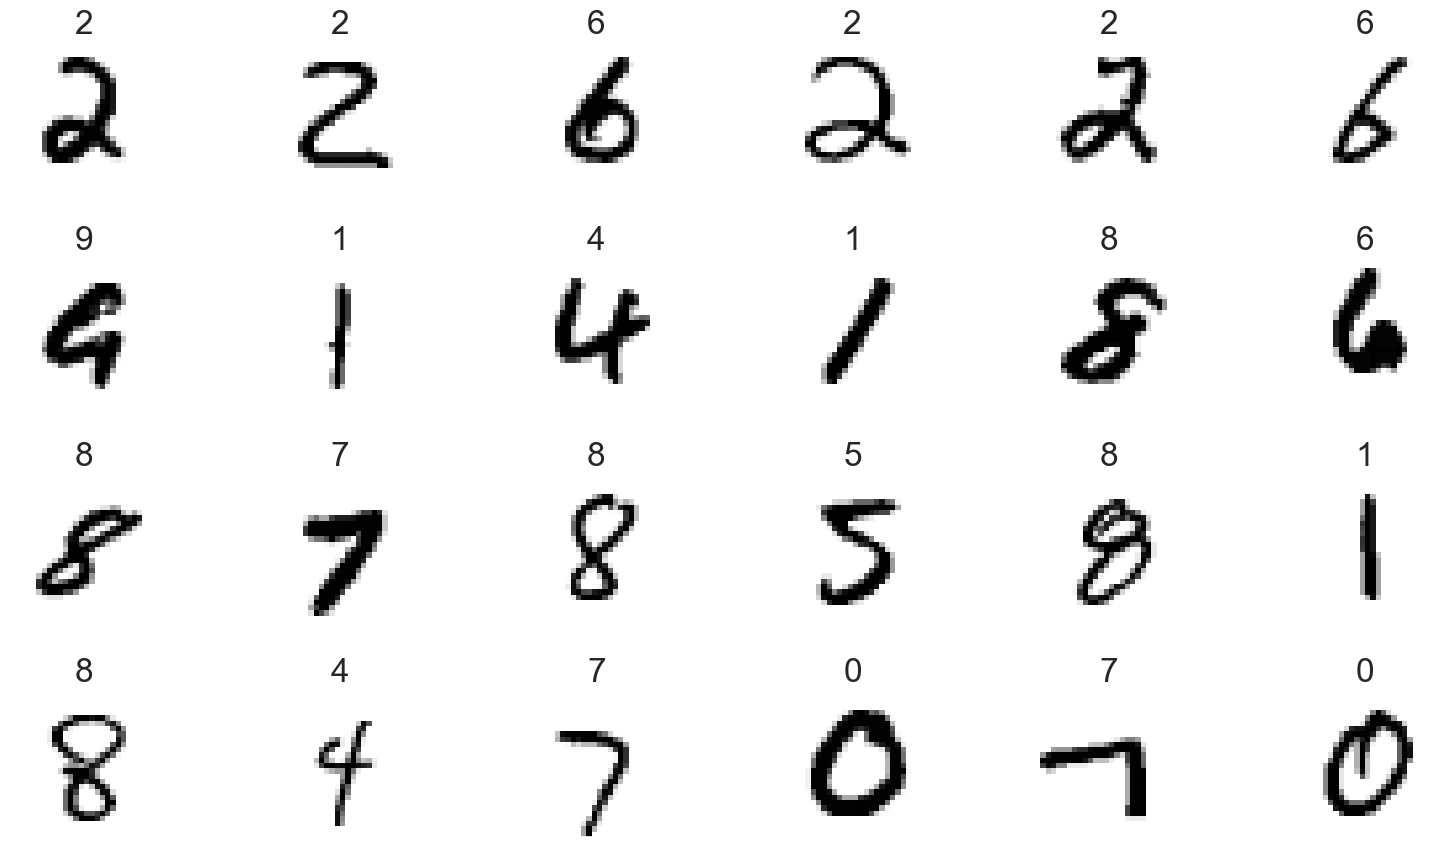

In [171]:
figure,axes = plt.subplots(nrows = 4, ncols = 6, figsize = (16,9))

for item in zip(axes.ravel(), X_train[indice], y_train[indice]):
    axes, image, target = item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

### Preparar los datos (Recordad que ka mayoría del trabajo es limpiar datos)

Cambia la figura de Xtrain a 60000 x 28 x 28 x 1

In [172]:
X_train = X_train.reshape((60000,28,28,1))

Checa su shape

In [173]:
X_train.shape

(60000, 28, 28, 1)

Cambia la figura de Xshape a 10000 x 28 x 28 x 1

In [174]:
X_test = X_test.reshape((10000,28,28,1))

Checa su Shape

In [175]:
X_test.shape

(10000, 28, 28, 1)

Normaliza con astype Xtrain

In [176]:
X_train = X_train.astype("float32")/255
# Normalizar los datos para escalar los valores de los px 0 y 1, lo que mejora el rendimiendo y la estabilidad del modelo

Normaliza con astype Xtest

In [177]:
X_test = X_test.astype("float32")/255


##### Desde tensorflow importa to_categorical // (One hot encoding)
    
    El One hot encoding convierte las etiquetas en vectores binarios

    Esto permite que la red neuronal trate cada clase como una categoría independiente (Haciendolo más rápido y legible para Keras)

In [178]:
from tensorflow.keras.utils import to_categorical

aplicalo a Y_train

In [179]:
y_train = to_categorical(y_train)

Checa su shape

In [180]:
y_train.shape

(60000, 10)

Checa el primer dato de Y_train

In [181]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Aplica to_categorical a Y-test

In [182]:
y_test = to_categorical(y_test)

Checa su figura

In [183]:
y_test.shape

(10000, 10)

### Crear la Red Neuronal

Importa Sequential desde tf

In [184]:
from tensorflow.keras.models import Sequential

Crea tu objeto cnn

In [185]:
cnn = Sequential()

importa las capas que necesitaras desde tf

In [186]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense #Diferentes capas que van a formar nuestra "capa oculta" (Dense de salida , el resto capa oculta)

#### Agrega la capa de Conv2d

Escanea toda la imagen y hace un filtro (normalmente se usa un filtro de 32 a 64 pero es variable)

In [187]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation = "relu", input_shape=(28,28,1))) #Datos procesados por la primera capa de convolución

c:\Users\Abri\anaconda3\envs\tf310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


cnn.add(Conv2D(                    # Añade una capa convolucional 2D (extrae características de las imagenes)


    filters=64,                    # Nº de filtros o mapas de características (detectan patrones diferente)
    kernel_size=(3,3),             # Tamaño del filtro o ventana que se desliza sobre la imagen
    activation = "relu",           # Función de activación ReLu: introduce no linealidad y evita valores
    input_shape=(28,28,1)))        # Tamaño específico de la entrada

#### Ahora agrega una capa de Pooling2d

Sirve para evitar la sobreoptimización (El entrenamiento sale perfecto pero al darle un nuevo dato que debería de ser reconocible, no lo reconoce) (overfitting)

Pooling2D usa Maxpooling

In [188]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

Agrega otra caba de Conv2D

In [189]:
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", input_shape=(28,28,1))) #Más filtros para conectar, más características detectadas en nuestras imagenes.

Y otra de Pooling

In [190]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

Aplana los resultados

In [191]:
cnn.add(Flatten()) # De 5x5x28 a, 3200

In [192]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,496 (291.00 KB)

 Trainable params: 74,496 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

##### Agrega una capa DENSE

Ya tenemos características asociadas a las imagenes hechas matriz, ahora les vamos a pasar algo para que sepan asociar esas características a los dígitos finales que devolveran como solución.

In [193]:
cnn.add(Dense(units=128, activation="relu"))
#Capa totalmente conectada con 128 neuronas ocultas
#Cada neurona esta conectada con todas las salidas de la capa anterior (Flatten)
#La activación ReLU introduce la no linealidad, permitiendo al modelo aprender patrones complejos

Y otra DENSE

In [194]:
cnn.add(Dense(units=10, activation="softmax"))
#Capa de salida con 10 neuronas, una por cada clase (en MNIST son los dígitos del 0 al 9)
#La activación Softmax convierte las salidas en probabilidades que suman 1
#Esto indica la probabilidad de que la imagen pertenezca a cada dígito

Imprime el resultado en un resumen

In [195]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Compila tu modelo

In [196]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.compile(
    
    optimizer="adam",                   # Algoritmo que ajusta los pesos (Adam = eficiente y adaptativo)
    loss="categorical_crosssentropy",   # Función pérdida para clasificación multiclase (etiquetas one-hot)
    metrics=["accuracy"])               # Métrica que evalúa el rendimiento (% de aciertos)

TODO LO QUE LLEVMOS ES DISEÑAR NUESTRO PROPIO ESTIMADOR??????

### Entrenar y Evaluar el modelo

Entrena tu modelo con fit

In [197]:
cnn.fit?
#x,y datos de entranamiento/etiquetas
#epochs = nº de veces que un modelo debería procesar todo el set de datos
#batch_size = nº de muestras a procesar una vez durante un epoch

Signature:
cnn.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It can be:
        - A NumPy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
        - A backend-native tensor, or a list of tensors
        (in case the model has multiple inputs).
        - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
        - A `keras.utils.PyDataset` returning `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
        - A `tf.data.Dataset` yielding `(inputs, targets)` or
        `(inpu

In [198]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1) #Esta linea no es poca cosa porque normalmente con datasets mas grandes cada pase(epochs) son 30seg en orddenadores buenos

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 196s 229ms/step - accuracy: 0.9557 - loss: 0.1470 - val_accuracy: 0.9873 - val_loss: 0.0452
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 220s 250ms/step - accuracy: 0.9862 - loss: 0.0441 - val_accuracy: 0.9885 - val_loss: 0.0396
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 180s 213ms/step - accuracy: 0.9907 - loss: 0.0296 - val_accuracy: 0.9892 - val_loss: 0.0393
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 208s 220ms/step - accuracy: 0.9936 - loss: 0.0207 - val_accuracy: 0.9908 - val_loss: 0.0362
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 203s 221ms/step - accuracy: 0.9953 - loss: 0.0159 - val_accuracy: 0.9897 - val_loss: 0.0399


Evalua le modelo con Evaluate

In [199]:
loss,accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.9901 - loss: 0.0375


In [200]:
loss #mide que tan mal predice el modelo

0.03746005520224571

In [201]:
accuracy #El porcentaje de aciertos sobre el conjunto de prueba

0.9901000261306763

Vamos a hacer predicciones

In [202]:
predicciones = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step


checa que dice el primer elemento de ytest

In [203]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

Y ahora que dice el primer elemento del modelo

In [204]:
for index, probability in enumerate(predicciones[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000410%
1: 0.0000002125%
2: 0.0000048632%
3: 0.0000020068%
4: 0.0000000001%
5: 0.0000000060%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000233%
9: 0.0000005632%


Ubiquemos las predicciones incorreectas

In [205]:
images = X_test.reshape((10000,28,28))

In [206]:
incorrect_predictions=[]

In [207]:
for i,(p,e)in enumerate(zip(predicciones, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

Obten el largo de esa lista

In [208]:
len(incorrect_predictions)

99

Visualiza las predicciones incorrectas

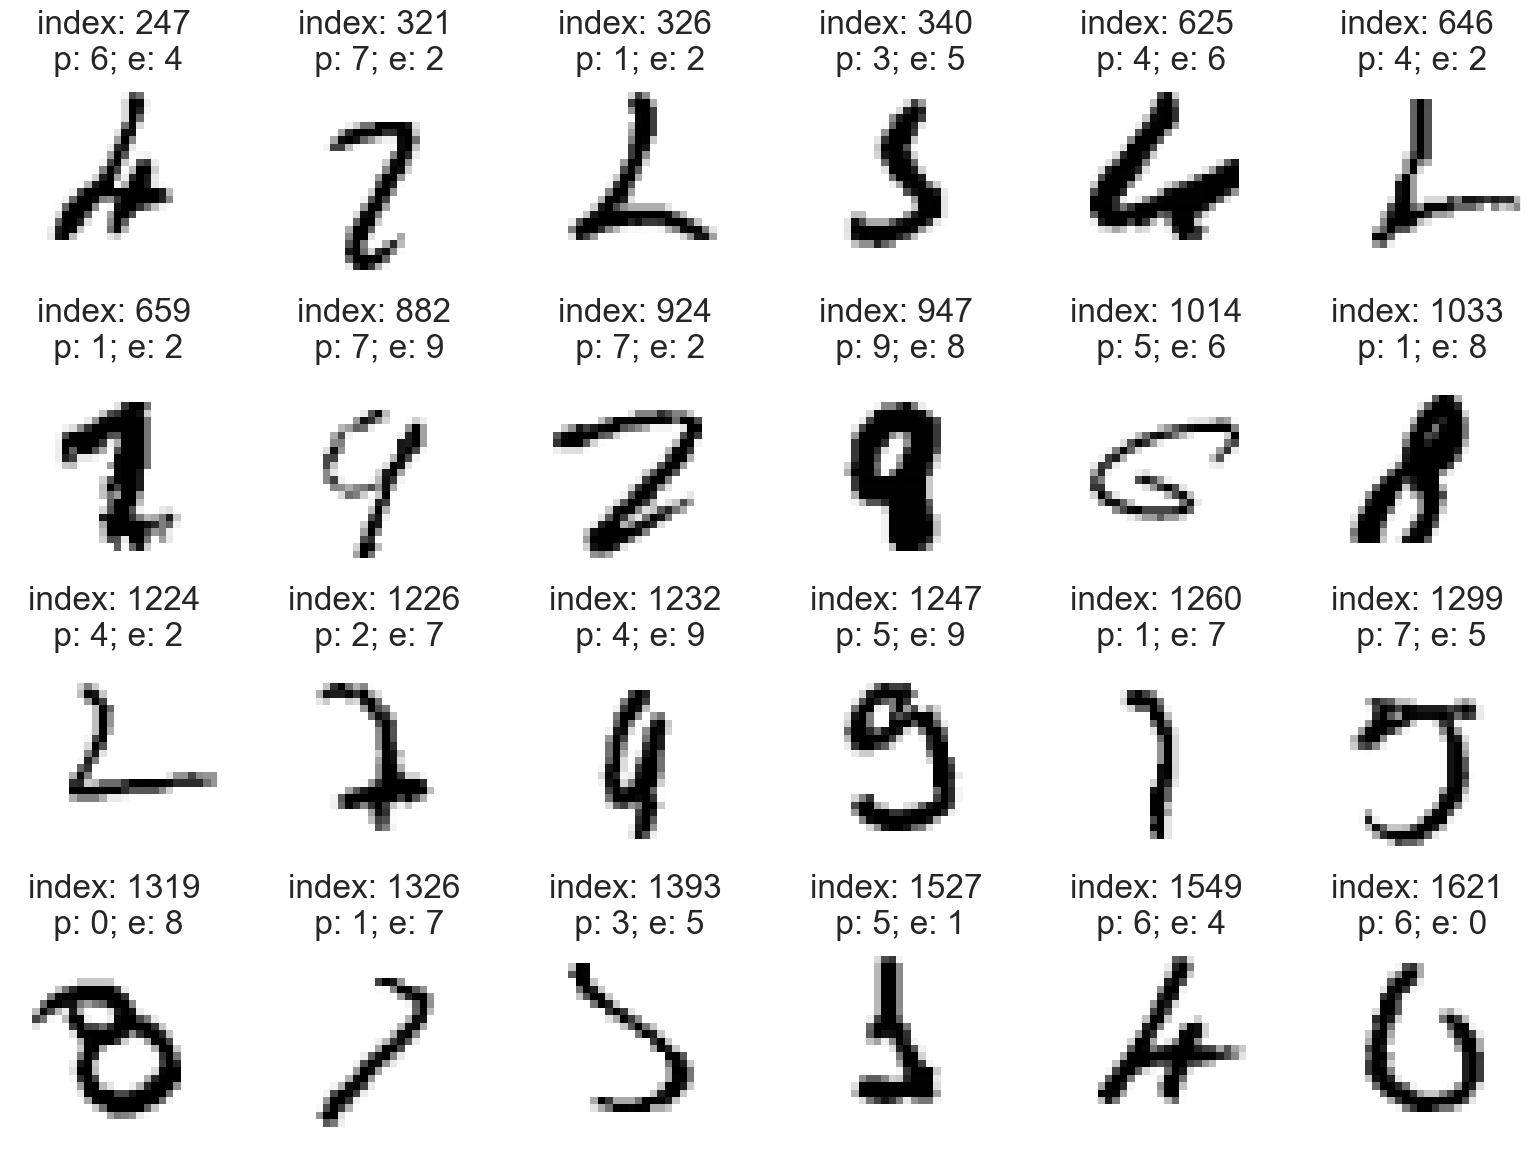

In [209]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index,image,predicted, expected = item
    axes.imshow(image, cmap= plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\n p: {predicted}; e: {expected}')
plt.tight_layout()
#plt.show()

Arma una funcion que genere un listado de las probabilidades para predicciones incorrectas

In [210]:
def muestraprob(prediction):
    for index, probability in enumerate(prediction):
        print(f'index: {index}; {probability:.10%}')
    

Muestra una que otra predicción incorrecta a detalles

In [211]:
muestraprob(predicciones[1790])

index: 0; 0.0772271655%
index: 1; 1.5156446025%
index: 2; 5.1425244659%
index: 3; 0.2248088364%
index: 4; 0.0064465989%
index: 5; 0.0002469996%
index: 6; 0.0000027290%
index: 7; 92.6062643528%
index: 8; 0.3385750577%
index: 9; 0.0882632157%


### Guardar tu Modelo

In [212]:
cnn.save("mnist_cnn.h5") #Queremos guardarlo para evitarnos repetir el costoso entrenamiento

In [213]:
from tensorflow.keras.models import load_model

In [214]:
dan = load_model("mnist_cnn.h5") #Volver a cargar el modelo guardado y previamente entrenado de cnn

## Analisis de Sentimientos con Redes Neuronales - IMDB ((para analizar datos en vez de secuencial, será recurrente) (se usa por ejemplo para el autorellernado de whatsapp))

### Cargar el dataset de IMBD

Import el dataset de imdb desde tensorlfow.keras.datasets

In [284]:
from tensorflow.keras.datasets import imdb

Carga las 10000 palabras que mas ocurren

In [285]:
numeropalabras = 10000

Carga tus palabras en tus datasets X_train y X_test y asi

In [286]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=numeropalabras)

### Exploracion de Datos

Figura de X_train

In [288]:
x_train.shape

(25000,)

Figura de Y_train

In [289]:
y_train.shape

(25000,)

Figura de X_test

In [290]:
x_test.shape

(25000,)

Figura de y_test

In [291]:
y_test.shape

(25000,)

Apaga pretty print

In [293]:
%pprint

Pretty printing has been turned OFF


Checa un elemento cualquiera de X_train

In [294]:
x_train[150] #muestra una reseña culaquierta, aun no esta traducido a palabras

[1, 5, 14, 9, 6, 55, 1193, 22, 13, 203, 30, 355, 21, 14, 9, 4, 236, 22, 121, 13, 1192, 2967, 3622, 35, 779, 284, 37, 5844, 4, 217, 5, 2132, 6, 749, 10, 10, 2636, 4252, 5, 2931, 4517, 26, 82, 321, 36, 26, 2, 5, 4960, 2, 1786, 8, 358, 4, 704, 117, 122, 36, 124, 51, 62, 593, 375, 10, 10, 4, 1381, 5, 732, 26, 821, 5, 1249, 14, 16, 159, 4, 504, 7, 3728, 4913, 10, 10, 51, 9, 91, 1193, 44, 14, 22, 9, 4, 192, 15, 1370, 40, 14, 131, 1778, 11, 938, 704, 3834, 131, 2, 543, 84, 12, 9, 220, 6, 1117, 5, 6, 320, 237, 4, 3286, 325, 10, 10, 25, 80, 358, 14, 22, 12, 16, 814, 11, 4, 3968, 8084, 7, 1226, 7111, 63, 131, 1778, 43, 92, 1278, 501, 15, 8, 6353, 2, 15, 1609, 131, 47, 24, 77, 2, 237, 2, 2, 158, 158]

Llama la función word to index

In [295]:
word_to_index = imdb.get_word_index() #obtiene el diccionario de las palabras por indice

Checa el indice de la palabra "bad"

In [296]:
word_to_index["bad"]

75

Reversa el mapeo del diccionario Word to INdex a Index to Word

In [297]:
index_to_word = {index: word for (word,index) in word_to_index.items()} #Invertir el diccionario creando uno nuevo

In [298]:
index_to_word[75]

'bad'

Armate una lista para revisar las 50 palabras mas comunes en el diccionario

In [299]:
[index_to_word[i] for i in range(1,51)]

['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i', 'this', 'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be', 'one', 'all', 'at', 'by', 'an', 'they', 'who', 'so', 'from', 'like', 'her', 'or', 'just', 'about', "it's", 'out', 'has', 'if', 'some', 'there', 'what', 'good', 'more']

Ok, ya estamos listos para leer una reseña

In [300]:
" ".join([index_to_word.get(i-3, "?") for i in x_train[123]]) #Convertir la reseña 123 de formato indices a palabras legibles

'? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too'

Y revisa de Y_train la clasificacion de esta reseña

In [301]:
y_train[123] #Lo que indica es si la reseña es positiva o negativa 
#0 = negativa
#1 = positiva

np.int64(1)

### Preparación de datos

Define palabras_por_reseña en 200

In [302]:
num_palabras_por_resena = 200

Importa pad_sequences de tensroflow

In [303]:
from tensorflow.keras.preprocessing.sequence import pad_sequences #funcion para normalizar la longitud de las secuencias

Define X_train como pad_sequences del viejo X_train

In [304]:
x_train = pad_sequences(x_train, maxlen=num_palabras_por_resena) #Nos asegurasmos que todas las reseñas tengan la maima longitud

Checa el nuevo shape de X_train

In [305]:
x_train.shape

(25000, 200)

Hay que reconfigurar X_Test tambien

In [306]:
x_test = pad_sequences(x_test, maxlen=num_palabras_por_resena)

Checa su figura

In [307]:
x_test.shape

(25000, 200)

Importa el Train_test_split y definelo sobre tus variables, semilla 11 y tamaño de prueba de .20

In [308]:
from sklearn.model_selection import train_test_split

In [309]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=11)

Checa la figura de xtest

In [311]:
x_train.shape

(20000, 200)

Y la de XVal

In [310]:
x_val.shape

(5000, 200)

### Crear la red neuronal

Desde Tensorflow importa Sequencial

In [312]:
from tensorflow.keras.models import Sequential

arma el objeto rnn com oun sequential

In [313]:
model = Sequential()

Importa las capas Dense y LSTM

In [314]:
from tensorflow.keras.layers import Embedding, LSTM, Dense

Agrega la capa de Embedding, que salgan 128 dimensiones

In [315]:
#Capa Embedding: convierte los índices de palabras en vectores de caracterísiticas
# - input_dim: tamaño del vocabulario (nº de palabras)
#output_dim: tamaño del vector de salida para cada palabra (dimensión de embedding)
#input_length: longitud máxima de cada reseña

model.add(Embedding(input_dim=10000, output_dim=128, input_length=num_palabras_por_resena))

agrega la capa de LSTM

In [316]:
#Capa LSTM: red recurrente que captura dependencias en secuencias de texto
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

Agrega una capa DENSE

In [317]:
#Capa final Dense: una neurona con activacion sigmoide para casificar 0(negativo) o 1(positivo)
model.add(Dense(1, activation = "sigmoid"))

Compila el RNN

In [318]:
#Compilar el modelo especificado
#optimizador: adam (buen punto de partida general)
#funcion de perdida(loss) "binary_crossentropy" (para clasificacion binaria)
#metricas: precision

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Y resvisa el resultado de RNN

In [320]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenar y evaluar el modelo

Usa Fit para entrenar el mdoelo

In [321]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 462s 731ms/step - accuracy: 0.7594 - loss: 0.4996 - val_accuracy: 0.7108 - val_loss: 0.5782
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 491s 786ms/step - accuracy: 0.8493 - loss: 0.3563 - val_accuracy: 0.8403 - val_loss: 0.3811
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 402s 644ms/step - accuracy: 0.8715 - loss: 0.3059 - val_accuracy: 0.8429 - val_loss: 0.3810
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 355s 568ms/step - accuracy: 0.8971 - loss: 0.2563 - val_accuracy: 0.8534 - val_loss: 0.3600
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 365s 584ms/step - accuracy: 0.9284 - loss: 0.1878 - val_accuracy: 0.8524 - val_loss: 0.3946
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 397s 635ms/step - accuracy: 0.9469 - loss: 0.1484 - val_accuracy: 0.8472 - val_loss: 0.4213
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 368s 588ms/step - accuracy: 0.9624 - loss: 0.1083 - val_accuracy: 0.8390 - val_loss: 0.4639
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 320s 513ms/step - accuracy: 0.9681 -

Checa tus resultados

In [322]:
resultados = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.8394 - loss: 0.5794


Y revisa el resultado

In [323]:
resultados  #Funcion de pérdida y % de la exactitud del modelo

[0.579362154006958, 0.8393999934196472]